In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import yfinance as yf
from talib import abstract

from backtesting import Strategy, Backtest
from backtesting.lib import crossover

## Backtesting Strategies
Additional info: https://kernc.github.io/backtesting.py/doc/examples/Quick%20Start%20User%20Guide.html

In [13]:
import strats, get_data

stock_obj = get_data.yFinData("SPY")
ydata = stock_obj.get_ohlcv()

In [14]:
ydata.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1993-01-29,25.987428,25.987428,25.858137,25.968958,1003200,0.0,0
1993-02-01,25.987429,26.153660,25.987429,26.153660,480500,0.0,0
1993-02-02,26.135176,26.227527,26.079766,26.209057,201300,0.0,0
1993-02-03,26.246001,26.504583,26.227531,26.486113,529400,0.0,0
1993-02-04,26.578467,26.652347,26.282946,26.596937,531500,0.0,0


In [15]:
period = "2"
ydata.iloc[-int(float(period)*252):]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-02-25,270.462121,271.020894,269.209652,269.296356,69030700,0.0,0
2019-02-26,268.920615,270.047805,268.699017,269.103668,56844100,0.0,0
2019-02-27,268.332917,269.363788,267.330977,268.988068,56921600,0.0,0
2019-02-28,268.756788,269.228885,268.140211,268.487030,69268300,0.0,0
2019-03-01,270.182710,270.606619,268.621967,270.163452,78880500,0.0,0
...,...,...,...,...,...,...,...
2021-02-17,390.420013,392.660004,389.329987,392.390015,52290600,0.0,0
2021-02-18,389.589996,391.519989,387.739990,390.720001,59552200,0.0,0
2021-02-19,392.070007,392.380005,389.549988,390.029999,83142800,0.0,0


In [16]:
# Run backtesting
import inspect

avail_strats = [obj for name, obj in inspect.getmembers(strats, inspect.isclass) if obj.__module__ == 'strats']
periods = ['0.5', '1', '2', 2020, 2019, 2018, 2017, 2016]

temp = []
sname_temp = []
equity_trades = {}
        
for s in avail_strats:
    for period in periods:
        if isinstance(period, str):
            data = ydata.iloc[-int(float(period)*252):]
        elif isinstance(period, int):
            data = ydata.loc["{}-12-31".format(period-1):"{}-12-31".format(period),]
        bt = Backtest(data, s, cash=10_000, commission=0)
        stats = bt.run()
        sname = str(stats["_strategy"])
        sname_temp.append("{}_{}".format(sname, period))
        
        temp.append(stats[:27])
        equity_trades[sname] = (stats["_equity_curve"], stats["_trades"])

temp = pd.concat(temp, axis=1)
temp.columns = sname_temp
temp

,MacdSignal_0.5,MacdSignal_1,MacdSignal_2,MacdSignal_2020,MacdSignal_2019,MacdSignal_2018,MacdSignal_2017,MacdSignal_2016,RsiSignal_0.5,RsiSignal_1,...,StochOsci_2017,StochOsci_2016,StochRsi_0.5,StochRsi_1,StochRsi_2,StochRsi_2020,StochRsi_2019,StochRsi_2018,StochRsi_2017,StochRsi_2016
Start,2020-08-24 00:00:00,2020-02-25 00:00:00,2019-02-25 00:00:00,2019-12-31 00:00:00,2018-12-31 00:00:00,2018-01-02 00:00:00,2017-01-03 00:00:00,2015-12-31 00:00:00,2020-08-24 00:00:00,2020-02-25 00:00:00,...,2017-01-03 00:00:00,2015-12-31 00:00:00,2020-08-24 00:00:00,2020-02-25 00:00:00,2019-02-25 00:00:00,2019-12-31 00:00:00,2018-12-31 00:00:00,2018-01-02 00:00:00,2017-01-03 00:00:00,2015-12-31 00:00:00
End,2021-02-23 00:00:00,2021-02-23 00:00:00,2021-02-23 00:00:00,2020-12-31 00:00:00,2019-12-31 00:00:00,2018-12-31 00:00:00,2017-12-29 00:00:00,2016-12-30 00:00:00,2021-02-23 00:00:00,2021-02-23 00:00:00,...,2017-12-29 00:00:00,2016-12-30 00:00:00,2021-02-23 00:00:00,2021-02-23 00:00:00,2021-02-23 00:00:00,2020-12-31 00:00:00,2019-12-31 00:00:00,2018-12-31 00:00:00,2017-12-29 00:00:00,2016-12-30 00:00:00
Duration,183 days 00:00:00,364 days 00:00:00,729 days 00:00:00,366 days 00:00:00,365 days 00:00:00,363 days 00:00:00,360 days 00:00:00,365 days 00:00:00,183 days 00:00:00,364 days 00:00:00,...,360 days 00:00:00,365 days 00:00:00,183 days 00:00:00,364 days 00:00:00,729 days 00:00:00,366 days 00:00:00,365 days 00:00:00,363 days 00:00:00,360 days 00:00:00,365 days 00:00:00
Exposure Time [%],38.8889,48.0159,55.5556,51.1811,45.4545,47.8088,43.8247,35.9684,0,0,...,0,1.97628,35.7143,31.746,35.5159,31.8898,33.2016,50.996,45.4183,37.9447
Equity Final [$],10025.4,11237.5,12655.8,12772.4,10479,9297.28,10836.9,10503.7,10000,10000,...,10000,10361,11413.5,11680.2,12998.3,11207.6,10863.4,9001.31,10743.8,11344.1
Equity Peak [$],10564.3,11850.5,13345.2,12956.1,10614.8,10070.8,10849.2,10549.8,10000,10000,...,10000,10401.3,11413.5,11680.2,12998.3,11219.3,10919.3,10017.5,10743.8,11487.9
Return [%],0.25391,12.3745,26.5584,27.7243,4.78967,-7.02723,8.36931,5.03665,0,0,...,0,3.61019,14.1349,16.802,29.9829,12.0762,8.63353,-9.98688,7.43845,13.4414
Buy & Hold Return [%],13.9361,26.2551,43.8935,18.3316,31.2239,-5.24716,20.7814,11.9979,13.9361,26.2551,...,20.7814,11.9979,13.9361,26.2551,43.8935,18.3316,31.2239,-5.24716,20.7814,11.9979
Return (Ann.) [%],0.508465,12.3745,12.4982,27.4784,4.77029,-7.05422,8.40402,5.01625,0,0,...,0,3.59567,30.2676,16.802,14.0101,11.9757,8.59798,-10.0246,7.46916,13.3848
Volatility (Ann.) [%],7.02397,12.9371,14.7747,21.3751,5.69486,7.71469,3.92737,5.0797,0,0,...,0,2.61615,13.1974,11.5849,14.1697,17.0751,8.70541,12.9244,5.24666,7.29516


In [20]:
def backtest_with_all_strats(ydata: pd.DataFrame, cash: int=10_000, commission: float=0.) -> Tuple[pd.DataFrame, dict]:
    """
    backtest all strategies in strats.py
    input: stock OHLCV dataframe
    output: dataframe of strategy returns, dictionary of trades and equity curve
    """
    temp = []
    sname_temp = []
    equity_trades = {}
    periods = ['0.5', '1', '2', 2020, 2019, 2018, 2017, 2016]
    
    for s in avail_strats:
        for period in periods:
            if isinstance(period, str):
                data = ydata.iloc[-int(float(period)*252):]
            elif isinstance(period, int):
                data = ydata.loc["{}-12-31".format(period-1):"{}-12-31".format(period),]
            bt = Backtest(data, s, cash=cash, commission=commission)
            stats = bt.run()
            sname = str(stats["_strategy"])
            sname_temp.append("{}_{}".format(sname, period))
            temp.append(stats[:27])
            equity_trades["{}_{}".format(sname, period)] = (stats["_equity_curve"], stats["_trades"])

    strat_returns = pd.concat(temp, axis=1)
    strat_returns.columns = sname_temp
    return strat_returns, equity_trades

backtest_with_all_strats(ydata)

NameError: name 'Tuple' is not defined

In [349]:
equity_trades['MacdSignal'][1]

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,374,53,56,26.703990,26.499856,-76.346009,-0.007644,1993-04-16,1993-04-21,5 days
1,375,66,76,26.407081,26.202936,-76.554170,-0.007731,1993-05-05,1993-05-19,14 days
2,368,77,90,26.741115,26.648321,-34.147964,-0.003470,1993-05-20,1993-06-09,20 days
3,362,104,109,27.042764,26.426022,-223.260565,-0.022806,1993-06-29,1993-07-07,8 days
4,356,114,118,26.874564,26.725062,-53.222882,-0.005563,1993-07-14,1993-07-20,6 days
...,...,...,...,...,...,...,...,...,...,...
290,94,6970,6985,330.292103,344.461674,1331.939664,0.042900,2020-10-02,2020-10-23,21 days
291,93,6995,7019,348.444702,363.351157,1386.300344,0.042780,2020-11-06,2020-12-11,35 days
292,88,7037,7043,380.589996,378.339996,-198.000000,-0.005912,2021-01-08,2021-01-19,11 days
293,87,7045,7050,384.489990,376.359985,-707.310425,-0.021145,2021-01-21,2021-01-28,7 days


<AxesSubplot:xlabel='EntryTime'>

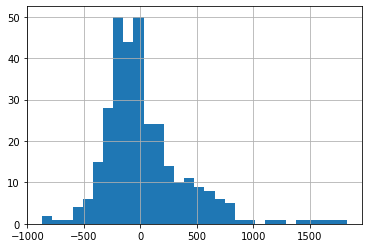

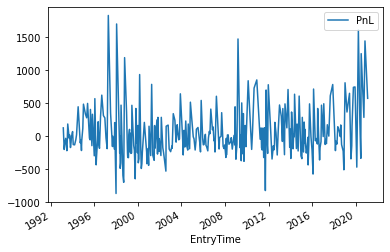

In [336]:
sma_trades['PnL'].hist(bins=30)
sma_trades.loc[:, ['PnL', "EntryTime"]].set_index('EntryTime').plot()

<AxesSubplot:xlabel='EntryTime'>

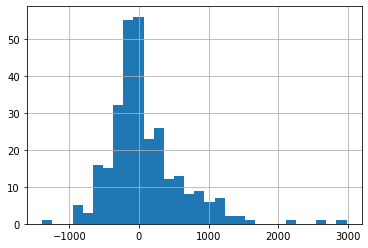

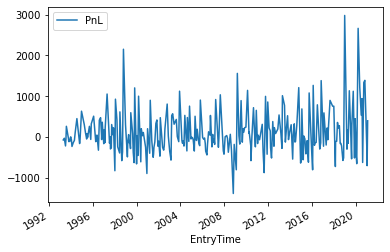

In [337]:
macd_trades = equity_trades['MacdSignal'][1]
macd_trades['PnL'].hist(bins=30)
macd_trades.loc[:, ['PnL', "EntryTime"]].set_index('EntryTime').plot()

<AxesSubplot:xlabel='EntryTime'>

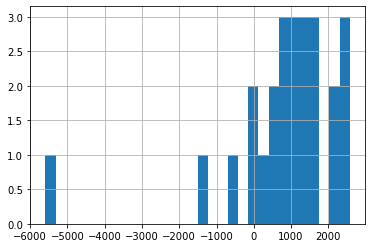

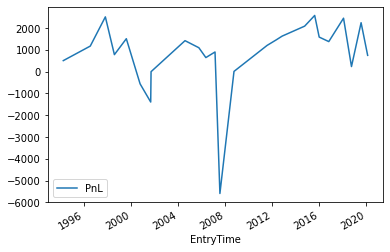

In [344]:
rsi_trades = equity_trades['RsiSignal'][1]
rsi_trades['PnL'].hist(bins=30)
rsi_trades.loc[:, ['PnL', "EntryTime"]].set_index('EntryTime').plot()

<AxesSubplot:xlabel='EntryTime'>

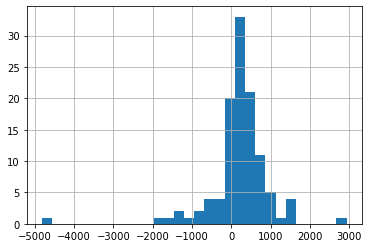

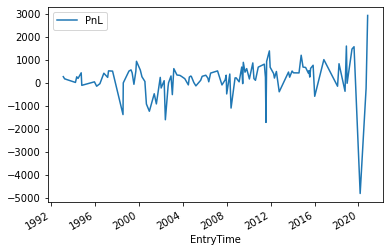

In [161]:
stoch_trades = equity_trades['StochOsci'][1]
stoch_trades['PnL'].hist(bins=30)
stoch_trades.loc[:, ['PnL', "EntryTime"]].set_index('EntryTime').plot()

<AxesSubplot:xlabel='EntryTime'>

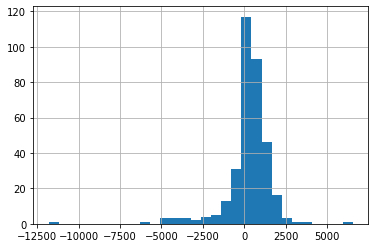

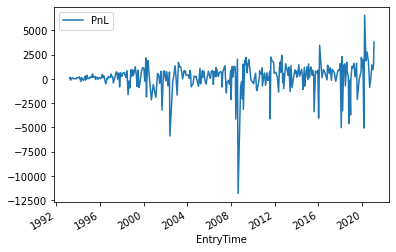

In [162]:
stochrsi_trades = equity_trades['StochRsi'][1]
stochrsi_trades['PnL'].hist(bins=30)
stochrsi_trades.loc[:, ['PnL', "EntryTime"]].set_index('EntryTime').plot()

## Generating Random Walks

<AxesSubplot:xlabel='Date'>

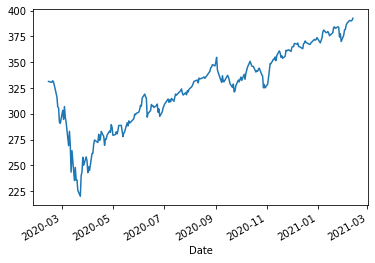

In [201]:
ydata.iloc[-252:, 3].plot()

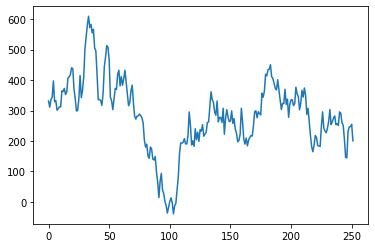

In [247]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=38.501280, size=252)
# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0
# Simulate stock prices, P with a starting price of 100
P = 331.410980 + np.cumsum(steps)
# Plot the simulated stock prices
plt.plot(P)

In [278]:
spy = yf.download("SPY", period="1y", auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


## Geometric Brownian Motion

In [279]:
adj_close = spy['Close']
# Stock Return (excl. dividents) = (P1 - P0)/P0, where P0 = Initial Stock Price, P1 = Ending Stock Price (Period 1)
adj_reversed = list(reversed(adj_close))

def daily_return(adj_reversed):
    returns = []
    for i in range(0, len(adj_reversed)-1):
        today = adj_reversed[i+1]
        yesterday = adj_reversed[i]
        
        daily_return = (today - yesterday)/yesterday
        
        returns.append(daily_return)
    return returns      

returns = daily_return(adj_reversed)

In [280]:
#compute the drift(mean) and diffusion(variance) coefficients and annualize it by multiplying by 250 trading days 
mu = np.mean(returns) * 250.            
sig = np.std(returns)* np.sqrt(250.)

In [281]:
#GBM based on real stock prices
def BrownianMotion(seed, N):
    np.random.seed(seed)
    Z = np.random.randn(N)     #random variables
    Z[0] = 0
    dW = np.sqrt(dt)* Z        #single Brownian increment
    W = np.cumsum(dW)          #Brownian path
    return W

# Parameters:
# So - initial stock price 
# mu - the mean of returns 
# sigma - standard deviation of returns (volatility)
# W - Brownian motion
# T - time horizon
# N - number of intervals

def GBM_Exact(So, mu, sigma, W, N, t):
    
    S = []
    S.append(So)
          
    for i in range(1,N):
        drift = (mu - 0.5 * sigma**2) *t[i]       #Calculating the deterministic part
        diffusion = sigma * W[i-1]                #Calculating the stochastic part
        S_i = So * np.exp(drift + diffusion)
        S.append(S_i)
        
    return S

seed = 20
N = 252     #assume 250 trading days for one year   
T = 1.0
dt = T / N                 #time step

So = adj_reversed[0]
W = BrownianMotion(seed, N)
t = np.linspace(0., T, N)    #time increments

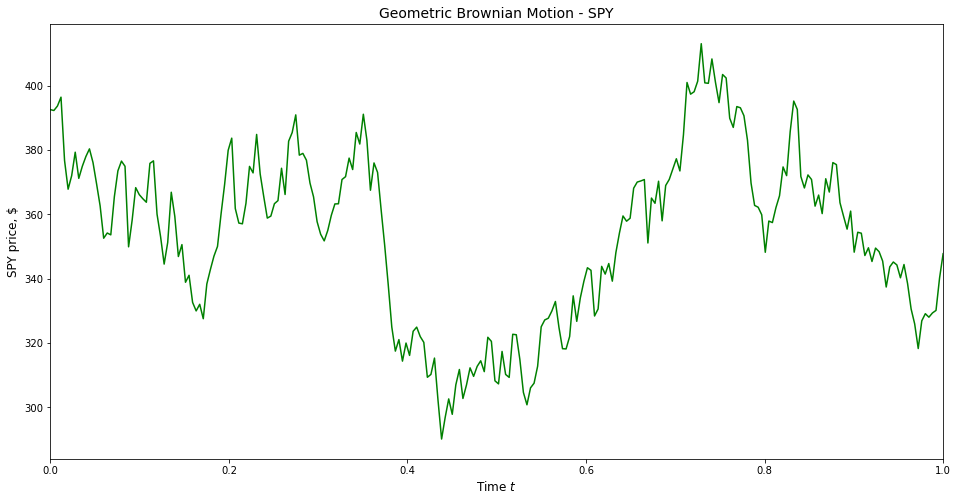

In [282]:
#plot solution

solution = GBM_Exact(So, mu, sig, W, N, t)

plt.figure(figsize = (16, 8))
plt.plot(t, solution, color = "green")

#plt.scatter(t, solution, color = "black")
plt.title('Geometric Brownian Motion - SPY', fontsize = 14)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('SPY price, $', fontsize = 12)

axes = plt.gca()
axes.set_xlim([0,T])
plt.show()

In [275]:
random_seeds = np.random.randint(1000, size=50)

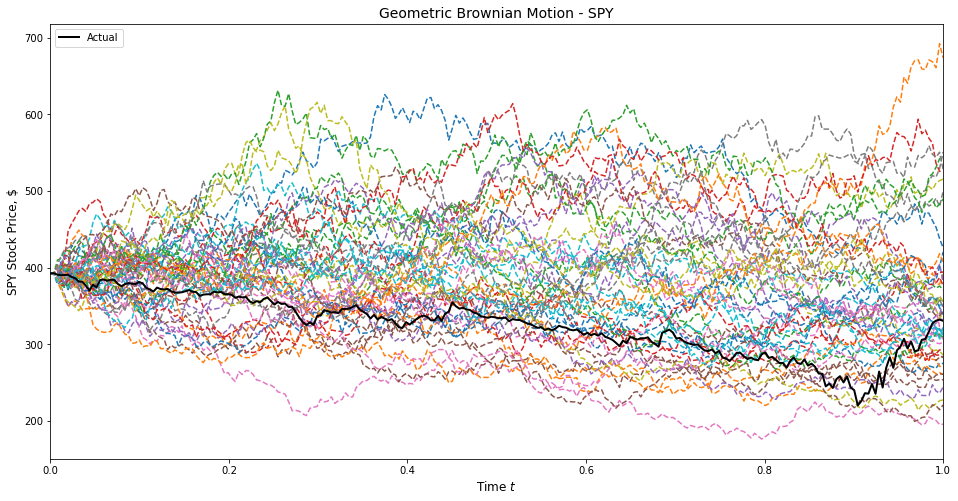

In [284]:
T=1.
N = 252
So = adj_reversed[0]

plt.figure(figsize = (16, 8))

simulated_prices = []
for seed in random_seeds:   
    W = BrownianMotion(seed, N)  
    solution = GBM_Exact(So, mu, sig, W, N, t)
    simulated_prices.append(solution)
    plt.plot(t, solution, ls='--')
    
plt.plot(t, adj_reversed, label = 'Actual', color = "black", linewidth = 2)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('SPY Stock Price, $', fontsize = 12)
plt.title('Geometric Brownian Motion - SPY', fontsize = 14)

plt.legend(loc = 'upper left')
axes = plt.gca()
axes.set_xlim([0,T])

plt.show()

In [294]:
simulated_df = pd.DataFrame(simulated_prices).transpose()
simulated_df['date'] = spy.index
simulated_df = simulated_df.set_index('date')
simulated_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,,,,,,,,,,,,
2020-02-18,392.549988,392.549988,392.549988,392.549988,392.549988,392.549988,392.549988,392.549988,392.549988,392.549988,...,392.549988,392.549988,392.549988,392.549988,392.549988,392.549988,392.549988,392.549988,392.549988,392.549988
2020-02-19,392.281171,392.281171,392.281171,392.281171,392.281171,392.281171,392.281171,392.281171,392.281171,392.281171,...,392.281171,392.281171,392.281171,392.281171,392.281171,392.281171,392.281171,392.281171,392.281171,392.281171
2020-02-20,388.407585,393.588540,400.408182,387.589624,393.604289,389.447598,389.472988,394.109449,389.623479,400.869158,...,383.398371,383.545129,391.039887,385.233710,382.806801,384.635070,387.557727,390.103634,383.981468,381.734460
2020-02-21,396.425403,399.962797,402.781600,386.801940,400.373724,384.515543,394.484702,382.004355,384.592044,402.211770,...,394.178423,389.983537,385.416306,376.429199,386.591568,398.660269,384.714180,384.921445,375.032365,391.240692
2020-02-24,396.185877,416.198742,393.167727,397.725720,399.821122,396.659239,403.162829,387.886521,380.715171,419.264008,...,394.671647,385.139673,385.796486,377.409243,380.589875,403.888398,389.156041,378.118361,360.282973,389.199189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-09,470.813434,268.492362,345.436653,278.942462,321.639650,260.120794,205.124841,513.306042,297.918570,356.000276,...,378.875054,401.300752,485.506452,397.094612,232.952869,213.772290,296.646633,355.188422,366.324128,305.968918
2021-02-10,461.265841,265.084206,349.004069,292.562759,313.231698,254.917822,202.691564,520.029758,290.961973,362.684056,...,384.958028,399.769846,489.575435,400.751515,247.231234,220.992802,306.225101,341.927934,364.669502,312.885098
2021-02-11,452.759408,261.393508,360.958492,285.858118,321.145656,252.909160,200.536538,517.990497,292.494252,355.816066,...,384.486758,406.759517,477.988008,391.086670,238.934250,219.807777,301.861882,349.863626,351.277223,315.401614


In [328]:
temp = []
equity_trades = {}
for i in range(2):
    temp_df = spy.drop("Close", index=1)
    temp_df['Close'] = simulated_df.iloc[:, [i]].rename(columns={i:"Close"})
    
    bt = Backtest(temp_df, strats.SmaCross, cash=10_000, commission=0)
    stats = bt.run()
    temp.append(stats[:27])
    equity_trades[i] = (stats["_equity_curve"], stats["_trades"])

temp = pd.concat(temp, axis=1)
#temp.columns = range(0:50)
temp

,0,1
Start,2020-02-18 00:00:00,2020-02-18 00:00:00
End,2021-02-16 00:00:00,2021-02-16 00:00:00
Duration,364 days 00:00:00,364 days 00:00:00
Exposure Time [%],54.7619,44.0476
Equity Final [$],13149.6,12600.8
Equity Peak [$],22758.8,16343
Return [%],31.496,26.0077
Buy & Hold Return [%],8.49063,-33.6195
Return (Ann.) [%],31.496,26.0077
Volatility (Ann.) [%],2699.97,495.154
